In [95]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import stockstats

In [135]:
df=pd.read_csv('nse_company_datail/ACC.csv')
df.rename(columns={'Close Price':'close'}, inplace=True)
stock = stockstats.StockDataFrame.retype(df)
stock['close_9_sma']

date
02-Jul-2021    1987.250000
01-Jul-2021    1991.625000
30-Jun-2021    1999.350000
29-Jun-2021    2012.775000
28-Jun-2021    2020.410000
                  ...     
07-Jan-2020    1498.766667
06-Jan-2020    1490.233333
03-Jan-2020    1487.066667
02-Jan-2020    1484.544444
01-Jan-2020    1476.344444
Name: close_9_sma, Length: 376, dtype: float64

In [136]:
stock['close_26_sma']

date
02-Jul-2021    1987.250000
01-Jul-2021    1991.625000
30-Jun-2021    1999.350000
29-Jun-2021    2012.775000
28-Jun-2021    2020.410000
                  ...     
07-Jan-2020    1503.967308
06-Jan-2020    1503.359615
03-Jan-2020    1502.344231
02-Jan-2020    1502.473077
01-Jan-2020    1501.330769
Name: close_26_sma, Length: 376, dtype: float64

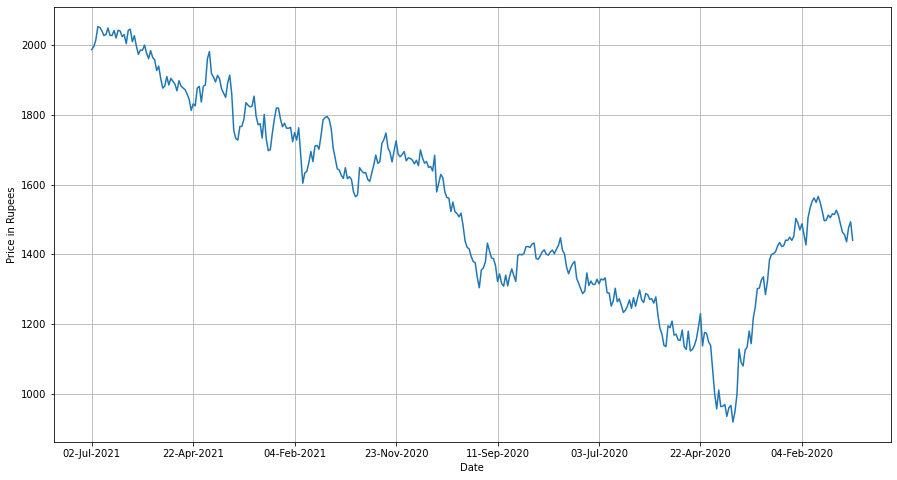

In [73]:
df=pd.read_csv('nse_company_datail/ACC.csv')
df.set_index('Date',inplace=True)
df['Close Price'].plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price in Rupees")
plt.show()

In [124]:
# create 20 days simple moving average column
# df['20_SMA'] = df['Close Price'].rolling(window = 20, min_periods =1).mean()
df['9_SMA'] = stock['close_9_sma']
# create 50 days simple moving average column
# df['50_SMA'] = df['Close Price'].rolling(window = 50, min_periods =1).mean()
df['26_SMA'] = stock['close_26_sma']
# display first few rows
df.head()

,symbol,series,prev close,open price,high price,low price,last price,close,average price,total traded quantity,turnover,no. of trades,deliverable qty,% dly qt to traded qty,,close_9_sma,9_SMA,close_26_sma,26_SMA
date,,,,,,,,,,,,,,,,,,,
02-Jul-2021,ACC,EQ,1996.00,2003.9,2004.35,1978.00,1991.0,1987.25,1987.49,293738,5.838021e+08,13624,89714,30.54,,1987.250,1987.250,1987.250,1987.250
01-Jul-2021,ACC,EQ,2014.80,2021.8,2021.80,1991.70,1996.6,1996.00,2002.69,335738,6.723781e+08,18569,109247,32.54,,1991.625,1991.625,1991.625,1991.625
30-Jun-2021,ACC,EQ,2053.05,2052.2,2052.45,2008.05,2016.0,2014.80,2031.44,450373,9.149043e+08,24909,238888,53.04,,1999.350,1999.350,1999.350,1999.350
29-Jun-2021,ACC,EQ,2050.95,2054.3,2064.90,2040.00,2052.2,2053.05,2051.50,279895,5.742053e+08,18467,72434,25.88,,2012.775,2012.775,2012.775,2012.775
28-Jun-2021,ACC,EQ,2041.15,2046.0,2059.95,2023.10,2050.0,2050.95,2047.63,380090,7.782856e+08,19919,145873,38.38,,2020.410,2020.410,2020.410,2020.410


In [125]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['9_SMA'] > df['26_SMA'], 1.0, 0.0)

In [126]:
df['Position'] = df['Signal'].diff()
df

,symbol,series,prev close,open price,high price,low price,last price,close,average price,total traded quantity,...,no. of trades,deliverable qty,% dly qt to traded qty,,close_9_sma,9_SMA,close_26_sma,26_SMA,Signal,Position
date,,,,,,,,,,,,,,,,,,,,,
02-Jul-2021,ACC,EQ,1996.00,2003.9,2004.35,1978.00,1991.0,1987.25,1987.49,293738,...,13624,89714,30.54,,1987.250000,1987.250000,1987.250000,1987.250000,0.0,NaN
01-Jul-2021,ACC,EQ,2014.80,2021.8,2021.80,1991.70,1996.6,1996.00,2002.69,335738,...,18569,109247,32.54,,1991.625000,1991.625000,1991.625000,1991.625000,0.0,0.0
30-Jun-2021,ACC,EQ,2053.05,2052.2,2052.45,2008.05,2016.0,2014.80,2031.44,450373,...,24909,238888,53.04,,1999.350000,1999.350000,1999.350000,1999.350000,0.0,0.0
29-Jun-2021,ACC,EQ,2050.95,2054.3,2064.90,2040.00,2052.2,2053.05,2051.50,279895,...,18467,72434,25.88,,2012.775000,2012.775000,2012.775000,2012.775000,0.0,0.0
28-Jun-2021,ACC,EQ,2041.15,2046.0,2059.95,2023.10,2050.0,2050.95,2047.63,380090,...,19919,145873,38.38,,2020.410000,2020.410000,2020.410000,2020.410000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
07-Jan-2020,ACC,EQ,1435.55,1450.0,1465.05,1436.00,1453.1,1456.00,1452.32,863805,...,26295,223430,25.87,,1498.766667,1498.766667,1503.967308,1503.967308,0.0,-1.0
06-Jan-2020,ACC,EQ,1476.30,1462.1,1469.85,1430.55,1433.0,1435.55,1445.74,408807,...,13675,147029,35.97,,1490.233333,1490.233333,1503.359615,1503.359615,0.0,0.0
03-Jan-2020,ACC,EQ,1493.05,1493.0,1494.00,1467.10,1476.8,1476.30,1478.78,568262,...,18109,146128,25.71,,1487.066667,1487.066667,1502.344231,1502.344231,0.0,0.0


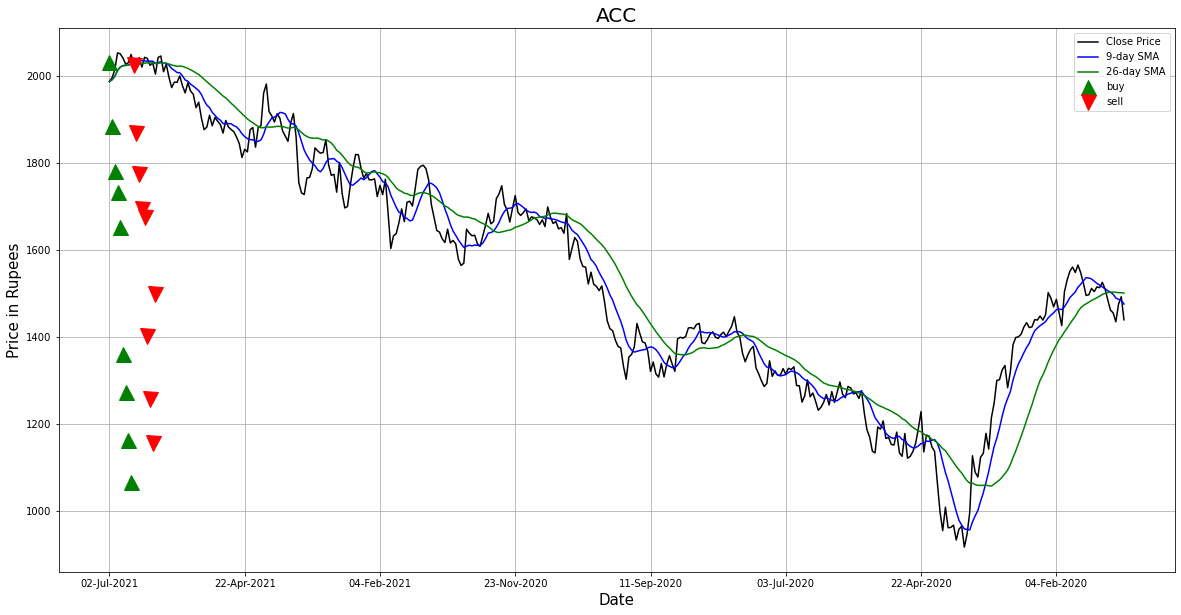

In [131]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df['close'].plot(color = 'k', label= 'Close Price') 
df['9_SMA'].plot(color = 'b',label = '9-day SMA') 
df['26_SMA'].plot(color = 'g',label = '26-day SMA')
# plot ‘buy’ signals
plt.plot(df[df['Position'] == 1].index,
         df['9_SMA'][df['Position'] == 1],'^',
         markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(df[df['Position'] == -1].index,
         df['9_SMA'][df['Position'] == -1],'v', 
         markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ACC', fontsize = 20)
plt.legend()
plt.grid()
plt.show()